<a href="https://colab.research.google.com/github/danvargasgo/Allignment/blob/main/Lab5/Lab5G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#Se piden todos los datos al usuario
funcion=input('Ingrese la función a evaluar: ')
rangoinferior=int(input('Ingrese el valor inferior del rango de búsqueda: '))
rangoSuperior=int(input('Ingrese el valor superior del rango de búsqueda: '))
genesize=int(input('Ingrese el número de genes de cada individuo: '))
populationsize=int(input('Ingrese el tamaño de la población: '))

probmutation=float(input('Ingrese una probabilidad de mutación entre 0 y 1: '))
while probmutation>1 or probmutation<0:
  probmutation=float(input('La probabilidad de mutación debe ser entre 0 y 1: '))

generations=int(input('Ingrese el número de generaciones: '))
solucion=float(input('Ingrese el máximo real de la función en el intervalo: '))

Ingrese la función a evaluar: math.sin(6*x)/(2*x)+1
Ingrese el valor inferior del rango de búsqueda: 0
Ingrese el valor superior del rango de búsqueda: 3
Ingrese el número de genes de cada individuo: 15
Ingrese el tamaño de la población: 100
Ingrese una probabilidad de mutación entre 0 y 1: 0.005
Ingrese el número de generaciones: 100
Ingrese el máximo real de la función en el intervalo: 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Mejores individuos por generación- generación vs individuo')

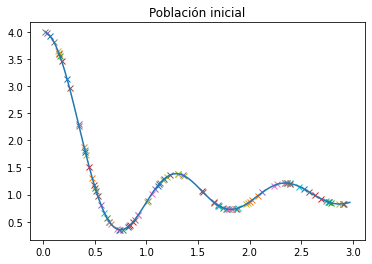

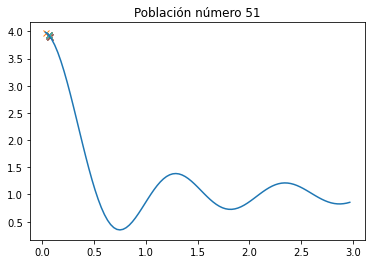

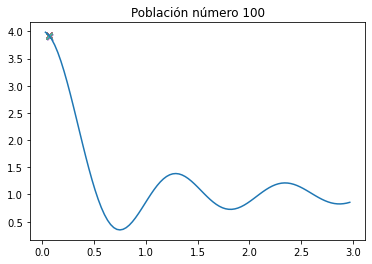

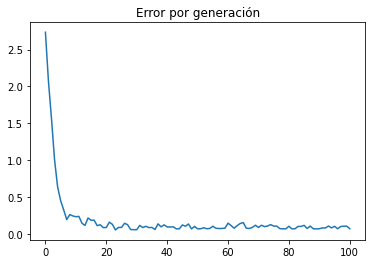

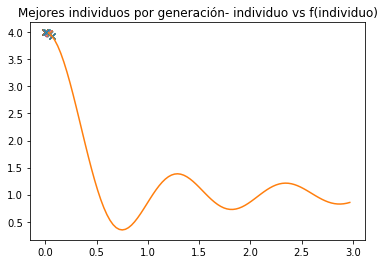

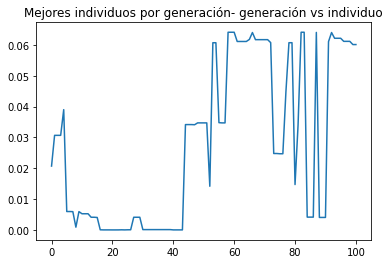

In [ ]:
#Se importan las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

#Definición de funciones
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]#+1 permite omitir el gen antiguo por el mutado
        individuals[i] = mutate_individual


#Evaluación función para crear curva
ejeY=[]
ejeX=np.arange(rangoinferior,rangoSuperior,(rangoSuperior-rangoinferior)/100)

for x in ejeX:
    ejeY.append(eval(funcion))

#Creación y graficación de población inicial
genetic_pool=[list(range(rangoinferior,rangoSuperior)),[0,1,2,3,4,5,6,7,8,9]] #se definen los valores que puede tomar cada individuo


poblacion = []

fitness=[]

error=[]

mejor=[]

for i in range(populationsize):
  individuo = []
  individuo += [np.random.choice(genetic_pool[0])]
  individuo += list(np.random.choice(genetic_pool[1],genesize-1))
  poblacion.append(individuo)

parents, ax1 = plt.subplots()

for individuo in poblacion:
    x = listToDecimal(individuo)
    y = eval(funcion)
    fitness += [y]
    ax1.plot(x,y,'x')
    ax1.set_title('Población inicial')
plt.plot(ejeX,ejeY)

#Cálculo error población 0
fitness = np.array(fitness)
yerr=fitness.sum()/populationsize
error.append(abs(solucion-yerr))



#Iteración por número de generaciones
for i in range(generations):
  it=i
  sttitulo='Población número '+str(it+1)

  #normalización fitness
  fitness=fitness/fitness.sum()

  #obtención mejor individuo generación
  mejor.append(listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]]))

  offspring = []

  #creación descendencia 
  for _ in range(populationsize//2):
      parents = np.random.choice(populationsize, 2, p=fitness)
      cross_point = np.random.randint(genesize)
      offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
      offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

  poblacion=offspring

  #mutación descendencia
  mutate(poblacion, probmutation, genetic_pool)

  #graficación de algunas generaciones seleccionadas
  if it ==generations//2 or it ==generations-1:
    children, ax2 = plt.subplots()

  fitness=[]
  for individuo in poblacion:
      x = listToDecimal(individuo)
      y = eval(funcion)
      fitness += [y]
      if it ==generations//2 or it ==generations-1:
        ax2.plot(x,y,'x')
        ax2.set_title(sttitulo)
  if it ==generations//2 or it ==generations-1:
    plt.plot(ejeX,ejeY)
  
  #cálculo error generación actual
  fitness = np.array(fitness)
  yerr=fitness.sum()/populationsize
  error.append(abs(solucion-yerr))

#graficación error
err, ax3 = plt.subplots()
ax3.plot(range(generations+1), error)
ax3.set_title('Error por generación')

#normalización fitness última generación
fitness=fitness/fitness.sum()

#obtención mejor individuo última generación
mejor.append(listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]]))

#Graficación mejores individuos
mej, ax4 = plt.subplots()
for x in mejor:
  y = eval(funcion)
  ax4.plot(x,y,'x')
  ax4.set_title('Mejores individuos por generación- individuo vs f(individuo)')
plt.plot(ejeX,ejeY)

mej2, ax5 = plt.subplots()

ax5.plot(range(generations+1),mejor)
ax5.set_title('Mejores individuos por generación- generación vs individuo')

